In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

path='/content/drive/My Drive/Datasets/Mall_Customers.csv'
df=pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
X=df.iloc[:,3:].values

WCSS – What it means (simple)

WCSS = Within-Cluster Sum of Squares

👉 It measures how compact (tight) the clusters are.

🔹 Definition

WCSS is the sum of squared distances between each data point and its cluster centroid.

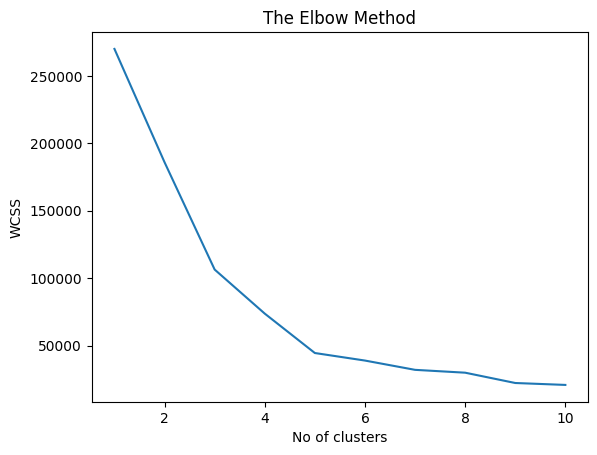

In [6]:
#elbow method to find the k value for cluster
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()

In [7]:
kmeans = KMeans(
    n_clusters=5,
    init='k-means++',
    random_state=0,
    n_init=10
)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

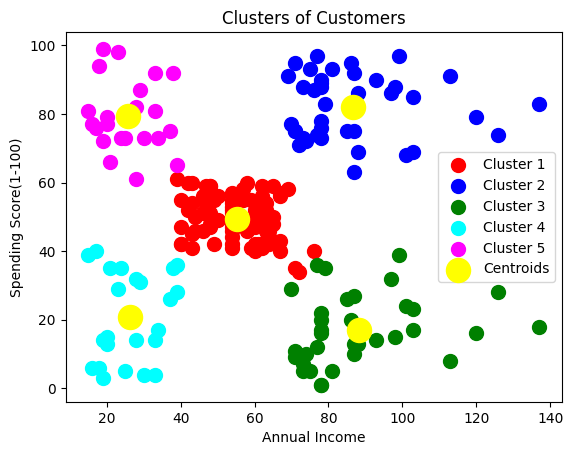

In [8]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title("Clusters of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score(1-100)")
plt.legend()




**Task on : Wholesale customer data**

Dataset Name: Wholesale Customers Dataset
🔗 https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set

# BUSINESS SCENARIO

A wholesale distributor supplies products to different types of clients such as:
- Retail stores  
- Cafés  
- Hotels  
- Restaurants  

Currently, all customers are treated the same, which leads to:
- Inefficient inventory planning  
- Poor marketing strategies  
- Missed upselling opportunities  

The company wants to group customers based on their purchasing behavior to improve decision-making.

---

## TASK 1: DATA EXPLORATION

The Wholesale Customers Dataset contains annual spending information of customers.

**Available features:**
- Channel  
- Region  
- Fresh  
- Milk  
- Grocery  
- Frozen  
- Detergents_Paper  
- Delicassen  

**Customer purchasing behavior columns:**
- Fresh  
- Milk  
- Grocery  
- Frozen  
- Detergents_Paper  
- Delicassen  

**Ignored columns:**
- Channel  
- Region  

---

## TASK 2: FEATURE SELECTION

**Selected features:**
- Fresh  
- Milk  
- Grocery  
- Frozen  
- Detergents_Paper  
- Delicassen  

**Justification:**  
These features are numerical and directly represent customer buying habits, making them suitable for distance-based clustering.

---

## TASK 3: DATA PREPARATION

The selected features are standardized so that all variables contribute equally to distance calculations required by K-Means clustering.

---

## TASK 4: CLUSTERING MODEL CONSTRUCTION

A K-Means clustering model is built to group customers into multiple segments.  
Different values of K are tested to understand customer grouping behavior.

---

## TASK 5: OPTIMAL CLUSTER IDENTIFICATION

The Elbow Method is used to identify the optimal number of clusters by analyzing the Within-Cluster Sum of Squares (WCSS).  
Based on the elbow point, **K = 3** is selected as a reasonable number of clusters.

---

## TASK 6: CLUSTER ASSIGNMENT

Each customer is assigned to one of the three clusters, and the cluster label is added to the dataset.

---

## TASK 7: CLUSTER VISUALIZATION

Customer clusters are visualized using **Milk** and **Grocery** spending categories.  
Cluster centers are clearly marked in the visualization.

---

## TASK 8: CLUSTER PROFILING

**Cluster 0 – Low Spenders**  
Customers with low spending across all categories. Typically small retailers.

**Cluster 1 – Retail Heavy Buyers**  
High spending on Grocery, Milk, and Detergents_Paper. Represents supermarkets and large retailers.

**Cluster 2 – HoReCa Customers**  
High spending on Fresh and Frozen products. Represents hotels, restaurants, and cafés.

---

## TASK 9: BUSINESS INSIGHT GENERATION

- **Cluster 0:** Bundled discounts and loyalty programs  
- **Cluster 1:** Bulk pricing and inventory prioritization  
- **Cluster 2:** Fresh-stock prioritization and contract-based supply  

---

## TASK 10: STABILITY AND LIMITATIONS

Clustering is repeated using a different random state and produces similar results, indicating stability.

**Limitation:**  
K-Means assumes spherical clusters and is sensitive to outliers. The number of clusters must be chosen beforehand.


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
path='/content/drive/My Drive/Datasets/Wholesale customers data.csv'
df=pd.read_csv(path)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [16]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [17]:
features = df[['Fresh','Milk','Grocery','Frozen',
               'Detergents_Paper','Delicassen']]


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [19]:
from sklearn.cluster import KMeans


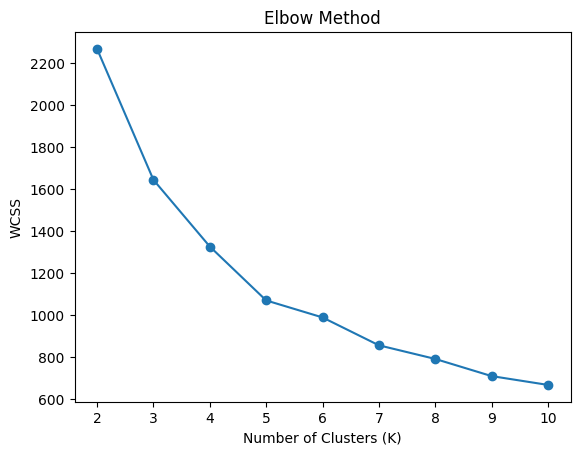

In [20]:
import matplotlib.pyplot as plt

wcss = []

for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    wcss.append(km.inertia_)

plt.plot(range(2,11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


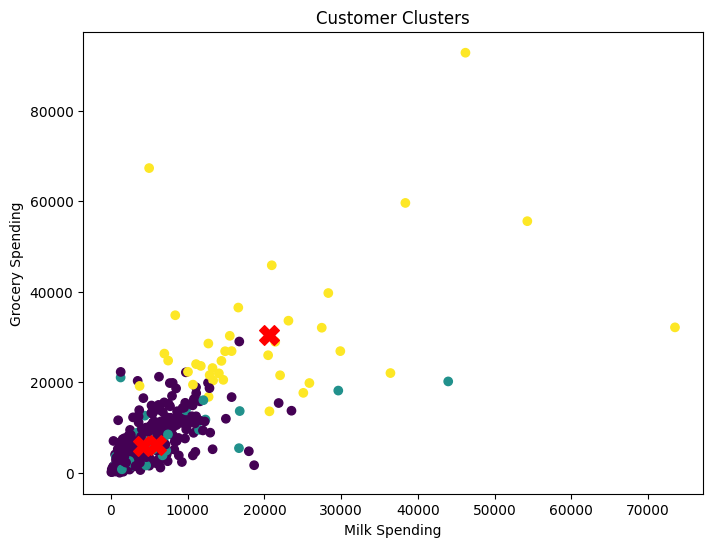

In [22]:
plt.figure(figsize=(8,6))

plt.scatter(df['Milk'], df['Grocery'],
            c=df['Cluster'], cmap='viridis')

centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:,1], centers[:,2],
            c='red', s=200, marker='X')

plt.xlabel('Milk Spending')
plt.ylabel('Grocery Spending')
plt.title('Customer Clusters')
plt.show()


In [23]:
cluster_profile = df.groupby('Cluster').mean()
cluster_profile


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,1.282857,2.534286,8935.500000,4228.528571,5848.034286,2167.231429,1913.605714,1102.120000
1,1.113208,2.698113,34540.113208,5860.358491,6122.622642,9841.735849,981.471698,3664.245283
2,2.000000,2.405405,8704.864865,20534.405405,30466.243243,1932.621622,14758.837838,2459.351351
